This notebook investigates alexnet-based models with 8-augmentation, an extra convolutional layer with 192 output channels and various dropout values at each layer. 

When training the models, we saved both files from the best and most recent epoch.

Let's see what score we got with the best parameter values from the models. We first look at the model specified in  `alexnet_extra_layer_dropouts.json` model, which has 0.75 dropout on all but last convolutional layers, and 0.5 dropout on the last layer.

In [1]:
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import holoviews as hl
%load_ext holoviews.ipython
import sklearn.metrics

Using gpu device 0: Tesla K40c
:0: FutureWarning: IPython widgets are experimental and may change in the future.


Welcome to the HoloViews IPython extension! (http://ioam.github.io/holoviews/)
Available magics: %compositor, %opts, %params, %view, %%labels, %%opts, %%view


In [4]:
cd ..

/afs/inf.ed.ac.uk/user/s08/s0805516/repos/neukrill-net-work


In [7]:
m = pylearn2.utils.serial.load("/disk/scratch/neuroglycerin/models/alexnet_extra_layer_dropouts2.pkl.recent")

In [2]:
%run check_test_score.py -v run_settings/alexnet_extra_layer_dropouts.json

Loading settings..
Loading model...
Loading data...
Applying normalisation: global
Finding batch size...
    chosen batch size 3089 for 8 batches
Compiling forward prop...
Making predictions...
    Batch 1 of 8
    Batch 2 of 8
    Batch 3 of 8
    Batch 4 of 8
    Batch 5 of 8
    Batch 6 of 8
    Batch 7 of 8
    Batch 8 of 8
Collapsing predictions...
Log loss: 1.11015507231


Using gpu device 1: Tesla K40c


Now check the model specified in `alexnet_extra_layer_dropouts2.json` model, which has 0.9 dropout on all but last convolutional layers, and 0.5 dropout on the last layer.

In [12]:
%run check_test_score.py -v run_settings/alexnet_extra_layer_dropouts2.json

Loading settings..
Loading model...
Loading data...
Applying normalisation: global
Finding batch size...
    chosen batch size 3089 for 8 batches
Compiling forward prop...
Making predictions...
    Batch 1 of 8
    Batch 2 of 8
    Batch 3 of 8
    Batch 4 of 8
    Batch 5 of 8
    Batch 6 of 8
    Batch 7 of 8
    Batch 8 of 8
Collapsing predictions...
Log loss: 0.886345365813


Finally, check the model specified in `alexnet_extra_layer_dropouts3.json` model, which has 0.5 dropout on all convolutional layers.

In [3]:
%run check_test_score.py -v run_settings/alexnet_extra_layer_dropouts3.json

Loading settings..
Loading model...
Loading data...
Applying normalisation: global
Finding batch size...
    chosen batch size 3089 for 8 batches
Compiling forward prop...
Making predictions...
    Batch 1 of 8
    Batch 2 of 8
    Batch 3 of 8
    Batch 4 of 8
    Batch 5 of 8
    Batch 6 of 8
    Batch 7 of 8
    Batch 8 of 8
Collapsing predictions...
Log loss: 2.08444720156


Looks like the `alexnet_extra_layer_dropouts2.json` model gave the best score. It also still continues to improve. Let's look at the evolution of nll:

In [8]:
def plot_monitor(model,c = 'valid_y_nll'):
    channel = model.monitor.channels[c]
    plt.title(c)
    plt.grid(which="both")
    plt.plot(channel.example_record,channel.val_record)
    return None

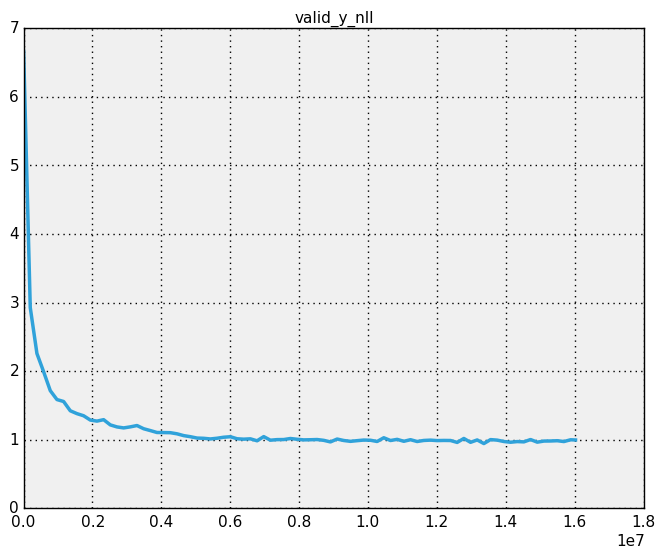

In [9]:
plot_monitor(m)

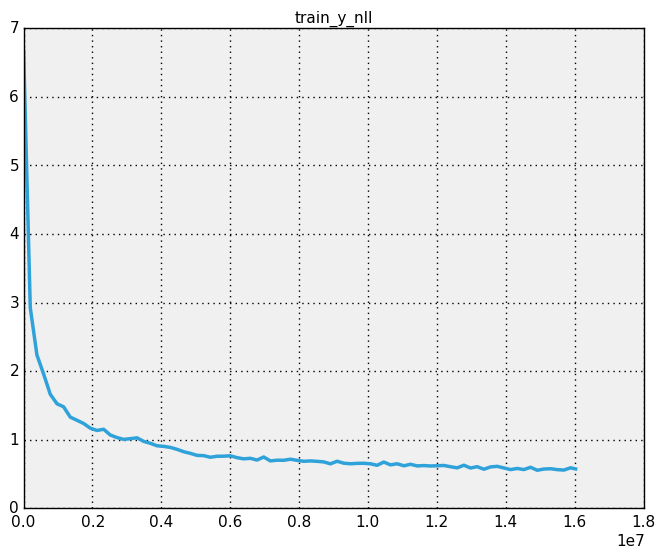

In [10]:
plot_monitor(m,c="train_y_nll")

The graph looks sort of stable for `valid_y_nll`. Perhaps there's not that much room for improvement? It could be useful to let the model run for around 85 epochs, which is roughly the time the current best model ran for. The #3 model was stopped, and #1 and #2 are let to run until ~epoch 85.

After ~85 epochs, the score is not better than the current best.

In [14]:
%run check_test_score.py -v run_settings/alexnet_extra_layer_dropouts2.json

Loading settings..
Loading model...
Loading data...
Applying normalisation: global
Finding batch size...
    chosen batch size 3089 for 8 batches
Compiling forward prop...
Making predictions...
    Batch 1 of 8
    Batch 2 of 8
    Batch 3 of 8
    Batch 4 of 8
    Batch 5 of 8
    Batch 6 of 8
    Batch 7 of 8
    Batch 8 of 8
Collapsing predictions...
Log loss: 0.886345365813
